# Training Multiple Models on Titanic Dataset

In [1]:
import numpy as np      # Import the NumPy library for numerical computations
import pandas as pd     # Import the Pandas library for data manipulation and analysis
import matplotlib.pyplot as plt     # Import the Matplotlib library for data visualization
import seaborn as sns   # Import the Seaborn library for statistical data visualization
from sklearn.linear_model import LogisticRegression     # Import the LogisticRegression class for logistic regression
from sklearn.model_selection import train_test_split    # Import the train_test_split function for splitting data
from sklearn.metrics import confusion_matrix    # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report   # Import the classification_report function for detailed classification metrics
from sklearn.neighbors import KNeighborsClassifier  # Import the KNeighborsClassifier class for k-nearest neighbors classification
from sklearn.tree import DecisionTreeClassifier     # Import the DecisionTreeClassifier class for decision tree classification
from sklearn.ensemble import RandomForestClassifier     # Import the RandomForestClassifier class for random forest classification
from sklearn.naive_bayes import GaussianNB      # Import the GaussianNB class for Gaussian naive Bayes classification
from sklearn.svm import SVC     # Import the SVC class for support vector machine classification

In [3]:
data = pd.read_csv("Titanic-Dataset.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Shape and size of our data
print("Shape of the data :- ",data.shape)
data.info

Shape of the data :-  (891, 12)


<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Describe the dataset

In [7]:
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
missing_values = data.isna().sum().sort_values(ascending=False)
missing_values

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<AxesSubplot:>

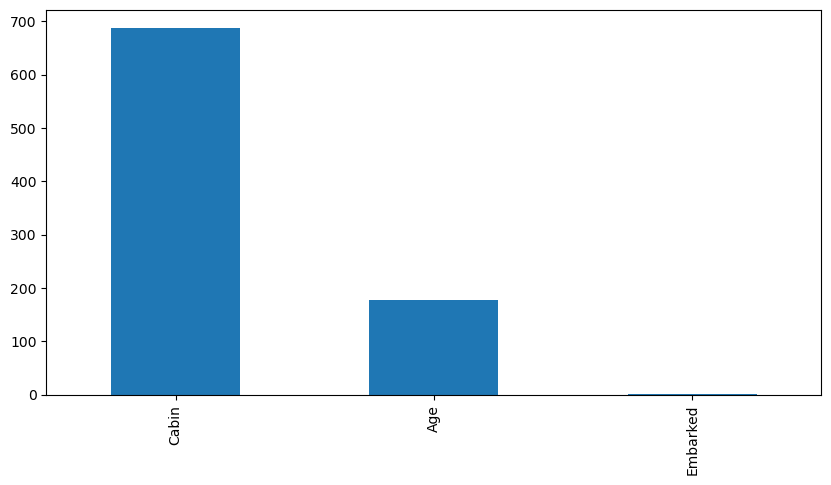

In [9]:
plt.figure(figsize=(10,5))
missing_values[missing_values != 0].plot.bar()

# Visualizing our data

In [11]:
def count_plot(feature):
    sns.countplot(x=feature, data=data)
    plt.show()
    print("\n")

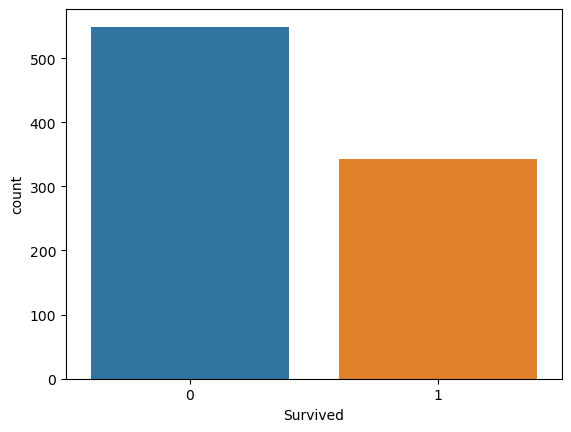

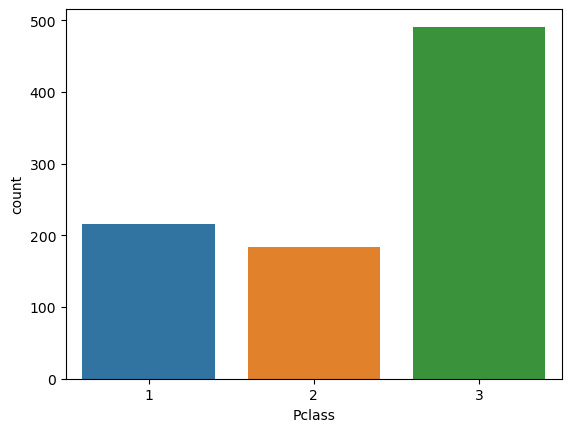

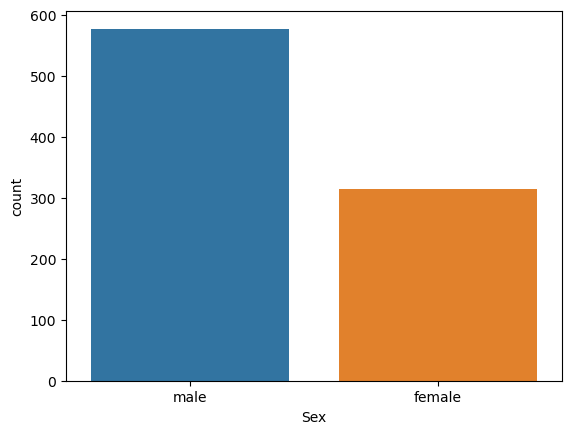

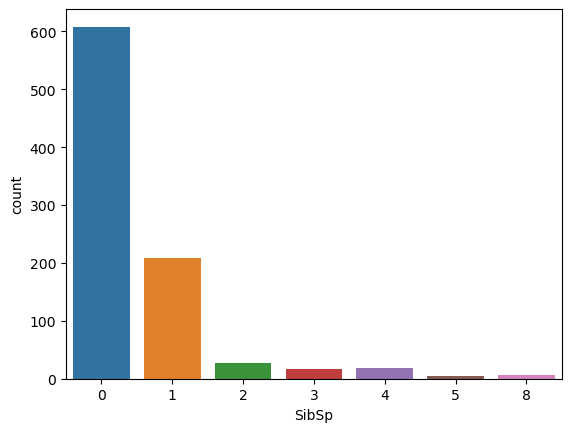

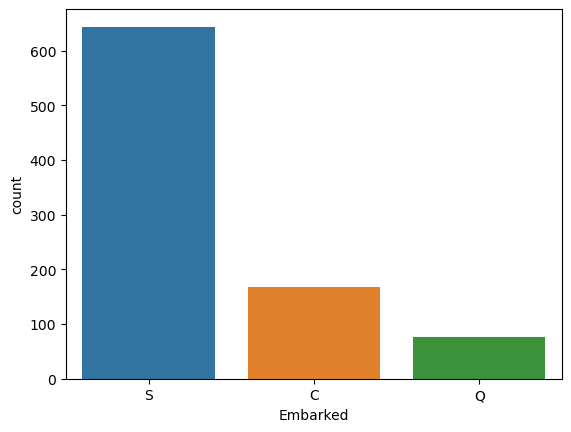

In [12]:
columns = ['Survived','Pclass','Sex','SibSp','Embarked']
for i in columns:
    count_plot(i)

In [17]:
data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [19]:
sex = pd.get_dummies(data["Sex"], drop_first=True)

# Display the first few rows of the resulting DataFrame 'sex'
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [27]:
embark = pd.get_dummies(data["Embarked"], drop_first=True)

# Display the first few rows of the resulting DataFrame 'embark'
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [28]:
pclass = pd.get_dummies(data["Pclass"], drop_first=True)

# Display the first few rows of the resulting DataFrame 'pclass'
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [29]:
data.drop(["Sex", "Embarked", "Pclass"], axis=1, inplace=True)
data.head(1)

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.25


In [30]:
X = data.drop("Survived", axis=1)
Y.shape
np.unique(Y)

# Creating the target variable Y by assigning the "Survived" column from the DataFrame 'data' to Y
# The result is assigned to the variable Y
Y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Logistic

In [31]:
log_reg = LogisticRegression(max_iter=1000, C=0.1)
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [32]:
log_reg.score(X_test, y_test)

0.6828358208955224

# Confusion matrix

In [33]:
y_predict = log_reg.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[150,   7],
       [ 78,  33]], dtype=int64)

# Classification Report of Logistic Regression

In [34]:
classification_report(y_test, y_predict)

'              precision    recall  f1-score   support\n\n           0       0.66      0.96      0.78       157\n           1       0.82      0.30      0.44       111\n\n    accuracy                           0.68       268\n   macro avg       0.74      0.63      0.61       268\nweighted avg       0.73      0.68      0.64       268\n'

# Knn

In [35]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [36]:
knn.score(X_test,y_test)

C:\Users\SAURAV\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6529850746268657

# DT

In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
# decision_tree.score(X_train,y_train)
decision_tree.score(X_test,y_test)

0.6567164179104478

In [44]:
random_forest = RandomForestClassifier(n_estimators=13)
random_forest.fit(X_train,y_train)
random_forest.score(X_test,y_test)

0.6567164179104478